In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets  import load_boston
from sklearn import preprocessing
import numpy as np
from sklearn.linear_model import SGDRegressor, LinearRegression, LogisticRegression
from sklearn.tree  import  DecisionTreeRegressor
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import auc
from sklearn import neighbors as nb
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
X, y = load_boston(return_X_y=True)

# K-fold

In [3]:
train = KFold(n_splits=5, shuffle=True, random_state=42)
train.get_n_splits(X, y);

# Standardization

In [4]:
std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)


### Gradiente Descedente

In [5]:
gd_rmse = []
gd_mae = []
for train_index, test_index in train.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = linear_model.SGDRegressor()
    clf.fit(X_train, y_train);
    y_pred_gd = clf.predict(X_test)
    
    rmse_gradiente = np.sqrt(metrics.mean_squared_error(y_test,y_pred_gd))
    mae_gradiente = metrics.mean_absolute_error(y_test, y_pred_gd)
    
    gd_rmse.append(rmse_gradiente)
    gd_mae.append(mae_gradiente)
    
print(np.mean(gd_rmse))
print(np.mean(gd_mae)) 
 

4.955202061722495
3.309049837742004


##  Linear Regression

In [6]:
linear_rmse = []
linaer_mae = []
for train_index, test_index in train.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_linear = model.predict(X_test)
    rme_linear = np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear))
    mae_linear = metrics.mean_absolute_error(y_test,y_pred_linear)
    linear_rmse.append(rme_linear)
    linaer_mae.append(mae_linear)
    
print (np.mean(linear_rmse)) 
print (np.mean(linaer_mae))

4.843271055765915
3.390747774440378


## KNN

In [7]:
knn_rmse = []
knn_mae = []

for train_index, test_index in train.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
   
    model_knn = nb.KNeighborsRegressor()
    model_knn.fit(X_train, y_train)
    y_pred_k = model_knn.predict(X_test)
   
    rmse_knn = np.sqrt(metrics.mean_squared_error(y_test, y_pred_k))
    mae_knn = metrics.mean_absolute_error(y_test, y_pred_k)
  
    knn_rmse.append(rmse_knn)
    knn_mae.append(mae_knn)
    
    
print(np.mean(knn_rmse))
print(np.mean(knn_mae))
    
    

4.553794249595725
2.8915340710541644


## Naive Bayes

In [8]:
rmse_nb = []
mae_nb = []

for train_index, test_index in train.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_nb = GaussianNB()
    model_nb.fit(X_train.astype(float), y_train.astype(int));
    y_pred_Nb = model_nb.predict(X_test)
    rmse_Nb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_Nb))
    mae_Nb = metrics.mean_absolute_error(y_test,y_pred_Nb)
    rmse_nb.append(rmse_Nb)
    mae_nb.append(mae_Nb)
    
print(np.mean(rmse_nb))    
print(np.mean(mae_nb))  

7.524088837808264
5.37641622985828


## SVM

In [9]:
rmse = []
mae = []
for train_index, test_index in train.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_svm = svm.SVR()
    model_svm.fit(X_train, y_train);
    y_pred_svm = model_svm.predict(X_test)
    rmse_svm = np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm))
    mae_svm = metrics.mean_absolute_error(y_test,y_pred_svm)
    rmse.append(rmse_svm)
    mae.append(mae_svm)
    
print(np.mean(rmse))
print(np.mean(mae))

5.450645653580333
3.1834174169648413


## KNN foi o melhor modelo

In [10]:
model_final = nb.KNeighborsRegressor();
model_final.fit(X,y);
y_pred_final = model_final.predict(X);
rmse_final = np.sqrt(metrics.mean_squared_error(y,y_pred_final));
mae_final = metrics.mean_absolute_error(y,y_pred_final);

rmse_final, mae_final

(3.3672833022994464, 2.13)

# Classificação

In [11]:
from sklearn.datasets import load_breast_cancer

In [12]:
X,y = load_breast_cancer(return_X_y=True)
data = load_breast_cancer()
data.feature_names
df = pd.DataFrame(data.data, columns=data.feature_names)

In [13]:
df.head

<bound method NDFrame.head of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89    

In [14]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

# Normalização

In [15]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X = preprocessing.minmax_scale(X)

## K-fold

In [16]:
train = KFold(n_splits=5, shuffle=True, random_state=42);
train.get_n_splits(X, y);

for train_index, test_index in train.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]



## Logistic Regression

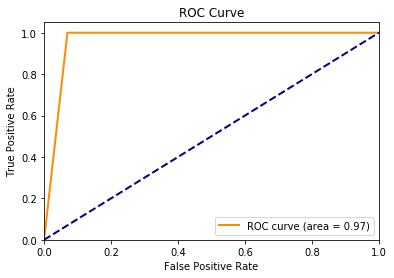

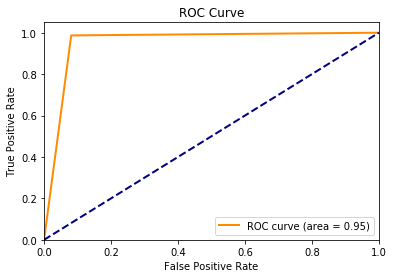

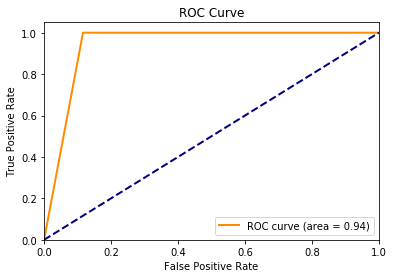

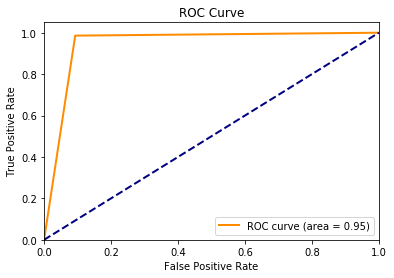

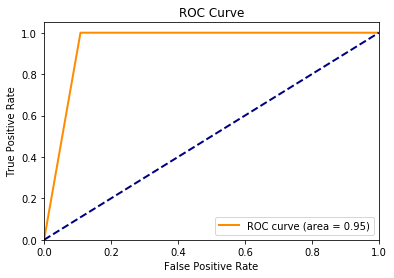

0.9613258810743673
0.9464393607464894
0.9945856959941466
0.9945856959941466


In [17]:
#Accuracy, Precision, Recall, F1-Measure, AOC
Lg_acuracy = []
lg_precision = []
lg_recall = []
lg_Measure = []
lg_AUC = []
media_fpr = []
media_tpr = []


for train_index, test_index in train.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
   
    model_logistic = LogisticRegression()
    model_logistic.fit(X_train, y_train);
    y_pred_logistic = model_logistic.predict(X_test)
   
    Lg_acuracy.append(metrics.accuracy_score(y_test, y_pred_logistic))
    lg_precision.append(metrics.precision_score(y_test, y_pred_logistic))
    lg_recall.append(metrics.recall_score(y_test, y_pred_logistic))
    lg_Measure.append(metrics.recall_score(y_test, y_pred_logistic))
    fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_logistic)
    roc = metrics.auc(fpr, tpr)
    
    plt.figure();
    plt.plot(fpr, tpr, color='darkorange',
    lw=2, label='ROC curve (area = %0.2f)' % roc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
print(np.mean(Lg_acuracy))
print(np.mean(lg_precision))
print(np.mean(lg_recall))
print(np.mean(lg_Measure))
    


# KNN

In [18]:
knn_acuracy = []
knn_precision = []
knn_recall = []
knn_Measure = []

model_final = nb.KNeighborsClassifier();
model_final.fit(X,y);
y_pred_final = model_final.predict(X);
rmse_final = np.sqrt(metrics.mean_squared_error(y,y_pred_final));
mae_final = metrics.mean_absolute_error(y,y_pred_final);

rmse_final, mae_final
    knn_acuracy.append(metrics.accuracy_score(y_test, y_pred_final))
    knn_precision.append(metrics.precision_score(y_test, y_pred_final ))
    knn_recall.append(metrics.recall_score(y_test, y_pred_final))
    knn_Measure.append(metrics.recall_score(y_test, y_pred_final ))
    fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_final )
    roc = metrics.auc(fpr, tpr)
    
    plt.figure();
    plt.plot(fpr, tpr, color='darkorange',
    lw=2, label='ROC curve (area = %0.2f)' % roc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
print( np.mean(knn_acuracy))
print( np.mean(knn_precision))
print( np.mean(knn_recall))
print( np.mean(knn_Measure))





IndentationError: unexpected indent (<ipython-input-18-d084c5071763>, line 13)

# Naive Bayes 



In [ ]:
nb_acuracy = []
nb_precision = []
nb_recall = []
nb_Measure = []
nb_AUC = []

for train_index, test_index in train.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_nb = GaussianNB()
    model_nb.fit(X_train.astype(float), y_train.astype(int));
    y_pred_nb = model_nb.predict(X_test)
    nb_acuracy.append(metrics.accuracy_score(y_test,y_pred_nb))
    nb_precision.append(metrics.precision_score(y_test,y_pred_nb))
    nb_recall.append(metrics.recall_score(y_test,y_pred_nb))
    nb_Measure.append(metrics.f1_score(y_test,y_pred_nb))
    fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_nb )
    roc = metrics.auc(fpr, tpr)
    
    plt.figure();
    plt.plot(fpr, tpr, color='darkorange',
    lw=2, label='ROC curve (area = %0.2f)' % roc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
print( np.mean(knn_acuracy))
print( np.mean(knn_precision))
print( np.mean(knn_recall))
print( np.mean(knn_Measure))


## SVM

In [ ]:
svm_acuracy = []
svm_precision = []
svm_recall = []
svm_Measure = []
svm_AUC = []

for train_index, test_index in train.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = svm.SVC()
    model_nb.fit(X_train.astype(float), y_train.astype(int));
    y_pred_svm = model_nb.predict(X_test)
    svm_acuracy.append(metrics.accuracy_score(y_test,y_pred_svm))
    svm_precision.append(metrics.precision_score(y_test,y_pred_svm))
    svm_recall.append(metrics.recall_score(y_test,y_pred_svm))
    svm_Measure.append(metrics.f1_score(y_test,y_pred_svm))
    fpr, tpr, thr = metrics.roc_curve(y_test,y_pred_svm)
    roc = metrics.auc(fpr, tpr)
    
    plt.figure();
    plt.plot(fpr, tpr, color='darkorange',
    lw=2, label='ROC curve (area = %0.2f)' % roc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
print( np.mean(svm_acuracy))
print( np.mean(svm_precision))
print( np.mean(svm_recall))
print( np.mean(svm_Measure))



## Melhor modelo foi KNN

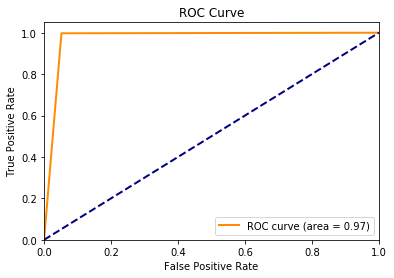

[0.9789103690685413]
[0.9700272479564033]
[0.9971988795518207]
[0.9834254143646408]
0.9726560435494952


In [39]:
final_acuracy = []
final_precision = []
final_recall = []
final_Measure = []
auc = []

model_final = nb.KNeighborsClassifier();
model_final.fit(X,y);
y_pred_final = model_final.predict(X);
    
final_acuracy.append(metrics.accuracy_score(y, y_pred_final))
final_precision.append(metrics.precision_score(y,y_pred_final))
final_recall.append(metrics.recall_score(y,y_pred_final))
final_Measure.append(metrics.f1_score(y,y_pred_final))
fpr, tpr, thr = metrics.roc_curve(y,y_pred_final)

roc = metrics.auc(fpr, tpr)
auc = roc
plt.figure();
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
    
print(final_acuracy)
print( final_precision)
print( final_recall)
print( final_Measure)
print(auc)


